# WeatherPy



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)


633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="
name = []
lat =[]
temp= []
Humidity =[]
Cloudiness=[]
Wind_Speed=[]

record = 1
for city in cities:
    try:   
        response = requests.get(query_url + city).json()
        print(f"Retrieving data for {city}, with city number:{record}")
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        record= record + 1
        
        time.sleep(1.01)
    except:
        print("City not found. Skipping...")
    continue
        

Retrieving data for provideniya, with city number:1
Retrieving data for atuona, with city number:2
Retrieving data for hithadhoo, with city number:3
Retrieving data for albany, with city number:4
Retrieving data for rikitea, with city number:5
Retrieving data for attawapiskat, with city number:6
City not found. Skipping...
Retrieving data for san buenaventura, with city number:6
Retrieving data for chokurdakh, with city number:7
Retrieving data for lasa, with city number:8
Retrieving data for bluff, with city number:9
Retrieving data for dikson, with city number:10
Retrieving data for sur, with city number:11
Retrieving data for punta arenas, with city number:12
Retrieving data for los llanos de aridane, with city number:13
Retrieving data for north bend, with city number:14
Retrieving data for tasiilaq, with city number:15
Retrieving data for touros, with city number:16
Retrieving data for barrow, with city number:17
Retrieving data for jamestown, with city number:18
Retrieving data f

Retrieving data for cape canaveral, with city number:141
Retrieving data for almaznyy, with city number:142
Retrieving data for carnarvon, with city number:143
Retrieving data for ostrovnoy, with city number:144
Retrieving data for mehamn, with city number:145
Retrieving data for kahama, with city number:146
Retrieving data for tuy hoa, with city number:147
Retrieving data for longyearbyen, with city number:148
Retrieving data for labuhan, with city number:149
Retrieving data for korla, with city number:150
City not found. Skipping...
Retrieving data for eyl, with city number:150
Retrieving data for adrar, with city number:151
Retrieving data for kodiak, with city number:152
Retrieving data for klaksvik, with city number:153
Retrieving data for cabinda, with city number:154
Retrieving data for xadani, with city number:155
City not found. Skipping...
Retrieving data for lieksa, with city number:155
Retrieving data for bengkulu, with city number:156
City not found. Skipping...
Retrieving

Retrieving data for boende, with city number:272
Retrieving data for bonthe, with city number:273
Retrieving data for muros, with city number:274
Retrieving data for warqla, with city number:275
City not found. Skipping...
Retrieving data for ocampo, with city number:275
Retrieving data for pangnirtung, with city number:276
Retrieving data for dunedin, with city number:277
Retrieving data for norman wells, with city number:278
Retrieving data for afmadu, with city number:279
City not found. Skipping...
Retrieving data for kudahuvadhoo, with city number:279
Retrieving data for ponta do sol, with city number:280
Retrieving data for east london, with city number:281
Retrieving data for marcona, with city number:282
City not found. Skipping...
Retrieving data for souillac, with city number:282
Retrieving data for azimur, with city number:283
City not found. Skipping...
Retrieving data for sao joao da barra, with city number:283
Retrieving data for talnakh, with city number:284
Retrieving d

Retrieving data for cap malheureux, with city number:398
Retrieving data for gonaives, with city number:399
Retrieving data for abha, with city number:400
Retrieving data for ketchikan, with city number:401
Retrieving data for seymchan, with city number:402
Retrieving data for nushki, with city number:403
Retrieving data for buta, with city number:404
Retrieving data for poyarkovo, with city number:405
Retrieving data for kidal, with city number:406
Retrieving data for asfi, with city number:407
City not found. Skipping...
Retrieving data for ust-kamchatsk, with city number:407
City not found. Skipping...
Retrieving data for amazar, with city number:407
Retrieving data for rundu, with city number:408
Retrieving data for umm lajj, with city number:409
Retrieving data for the pas, with city number:410
Retrieving data for havre, with city number:411
Retrieving data for tefe, with city number:412
Retrieving data for hoquiam, with city number:413
Retrieving data for mariental, with city num

Retrieving data for kasane, with city number:538
Retrieving data for umzimvubu, with city number:539
City not found. Skipping...
Retrieving data for kaka, with city number:539
Retrieving data for tiznit, with city number:540
Retrieving data for takhtamygda, with city number:541
Retrieving data for karaul, with city number:542
City not found. Skipping...
Retrieving data for san andres, with city number:542
Retrieving data for grand gaube, with city number:543
Retrieving data for shache, with city number:544
Retrieving data for maragogi, with city number:545
Retrieving data for lhokseumawe, with city number:546
Retrieving data for shimanovsk, with city number:547
Retrieving data for yoichi, with city number:548
Retrieving data for luang prabang, with city number:549
Retrieving data for mezen, with city number:550
Retrieving data for oda, with city number:551
Retrieving data for shimoda, with city number:552
Retrieving data for kulgam, with city number:553
Retrieving data for kurchum, wit

In [19]:
weather_dict = {'name': name,
                'lat': lat,
                'temp': temp,
                'Humidity': Humidity,
                'Cloudiness': Cloudiness,
                'Wind_Speed': Wind_Speed}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
df = pd.DataFrame(weather_dict)
df.to_csv('Cityweatherdata.csv')
df

,name,lat,temp,Humidity,Cloudiness,Wind_Speed
0,Provideniya,64.42,-3.00,73,90,3.00
1,Atuona,-9.80,26.94,73,21,9.65
2,Hithadhoo,-0.60,27.57,73,68,3.10
3,Albany,42.65,11.93,58,90,4.10
4,Rikitea,-23.12,24.84,80,0,2.40
...,...,...,...,...,...,...
558,Deputatskiy,69.30,-18.07,94,100,1.28
559,Charters Towers,-20.07,22.17,29,5,7.55
560,Novovarshavka,54.17,-4.92,88,33,5.86
561,Komsomolskiy,67.55,-5.53,93,100,8.69


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

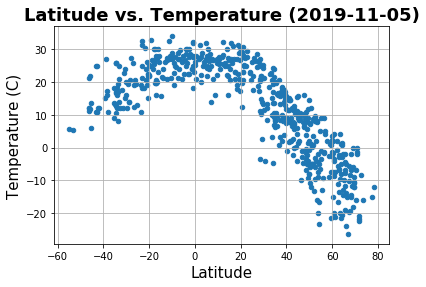

<Figure size 432x288 with 0 Axes>

In [15]:
df.plot(kind='scatter', x='lat', y='temp')

x_lim = len(df.index)

plt.title("Latitude vs. Temperature (2019-11-05)", fontdict = {'fontsize': 18, 'fontweight': 'bold'})

plt.xlabel("Latitude", fontdict = {'fontsize': 15})

plt.ylabel("Temperature (C)", fontdict = {'fontsize': 15})
plt.grid()
 

plt.show()

plt.savefig('LatitudevsTemperature.png')

### Latitude vs. Humidity Plot

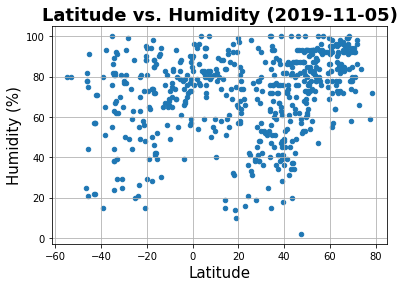

<Figure size 432x288 with 0 Axes>

In [16]:
df.plot(kind='scatter', x='lat', y='Humidity')

x_lim = len(df.index)

plt.title("Latitude vs. Humidity (2019-11-05)", fontdict = {'fontsize': 18, 'fontweight': 'bold'})

plt.xlabel("Latitude", fontdict = {'fontsize': 15})

plt.ylabel("Humidity (%)", fontdict = {'fontsize': 15})
plt.grid()
 

plt.show()

plt.savefig('LatitudevsHumidity.png')

### Latitude vs. Cloudliness Plot

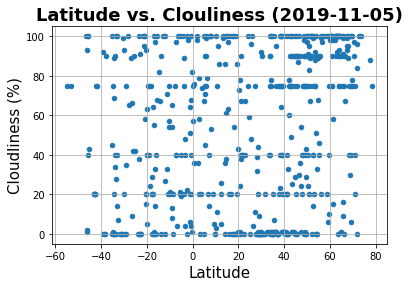

<Figure size 432x288 with 0 Axes>

In [17]:
df.plot(kind='scatter', x='lat', y='Cloudiness')

x_lim = len(df.index)

plt.title("Latitude vs. Cloudliness (2019-11-05)", fontdict = {'fontsize': 18, 'fontweight': 'bold'})

plt.xlabel("Latitude", fontdict = {'fontsize': 15})

plt.ylabel("Cloudliness (%)", fontdict = {'fontsize': 15})
plt.grid()
 

plt.show()

plt.savefig('LatitudevsCloudliness.png')

### Latitude vs. Wind Speed  Plot

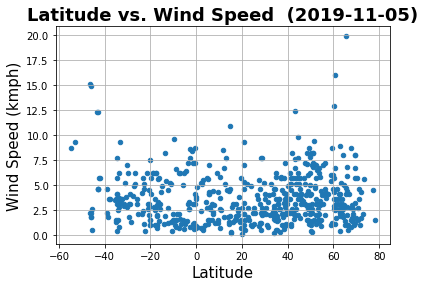

<Figure size 432x288 with 0 Axes>

In [18]:
df.plot(kind='scatter', x='lat', y='Wind_Speed')

x_lim = len(df.index)

plt.title("Latitude vs. Wind Speed  (2019-11-05)", fontdict = {'fontsize': 18, 'fontweight': 'bold'})

plt.xlabel("Latitude", fontdict = {'fontsize': 15})

plt.ylabel("Wind Speed (kmph)", fontdict = {'fontsize': 15})
plt.grid()
 

plt.show()

plt.savefig('LatitudevsWindSpeed.png')